In [157]:
from typing import Annotated
from typing_extensions import TypedDict

In [158]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

In [159]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)

arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [160]:
wiki_tool.invoke("Who is Pawan Kalyan?")

'Page: Pawan Kalyan\nSummary: Konidela Pawan Kalyan (born Konidela Sri Kalyan Kumar; 2 September 1971) is an Indian politician, actor, serving as the 11th Deputy Chief Minister of Andhra Pradesh since June 2024. He is also the Minister of Panchayat Raj, Rural Development and Rural Water Supply; Enviro'

In [161]:
arxiv_tool.invoke("Attention is All You Need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [162]:
tools = [wiki_tool]

In [163]:
from langchain.tools import tool

wiki = WikipediaAPIWrapper()
@tool
def wikipedia_search(query: str) -> str:
    """Search Wikipedia for a given query and return a summary."""
    return wiki.run(query)

tools = [wikipedia_search]

In [164]:
from langgraph.graph import add_messages

In [165]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [166]:
from langgraph.graph import StateGraph, START, END

In [167]:
graph_builder = StateGraph(State)

In [168]:
from langchain_groq import ChatGroq

In [169]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [170]:
groq_api_key = os.getenv("GROQ_API_KEY")

In [171]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-it")

In [172]:
llm_with_tools = llm.bind_tools(tools=tools)

In [173]:
def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [174]:
from langgraph.prebuilt import ToolNode, tools_condition

In [130]:
# graph_builder.add_node("chatbot", chatbot)
# tool_node = ToolNode(tools=tools)
# graph_builder.add_node("tools", tool_node)

# graph_builder.add_conditional_edges("chatbot", tools_condition)

# graph_builder.add_edge("tools", "chatbot")
# graph_builder.add_edge(START, "chatbot")
# graph_builder.add_edge("chatbot", END)


In [175]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")


In [176]:
graph_builder

In [177]:
graph = graph_builder.compile()

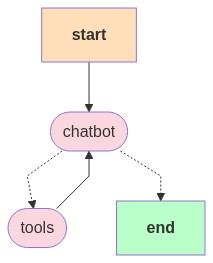

In [178]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [179]:
from langchain_core.messages import HumanMessage, BaseMessage

user_input = "Hi there!, My name is John"

events = graph.stream(
    {"messages": [HumanMessage(content=user_input)]},
    stream_mode="values"
)

for event in events:
    print("Event keys:", event.keys())
    if "messages" in event:
        for msg in event["messages"]:
            if isinstance(msg, BaseMessage):
                msg.pretty_print()


Event keys: dict_keys(['messages'])
================================ Human Message =================================

Hi there!, My name is John
{'messages': [HumanMessage(content='Hi there!, My name is John', id='25a895bf-7491-4f3e-a394-62f1221fd630')]}
Event keys: dict_keys(['messages'])
================================ Human Message =================================

Hi there!, My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia_search (34yb7n8qy)
 Call ID: 34yb7n8qy
  Args:
    query: John


C:\Users\004NQ8744\OneDrive\Roadwork\langChain\venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\004NQ8744\OneDrive\Roadwork\langChain\venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Event keys: dict_keys(['messages'])
================================ Human Message =================================

Hi there!, My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia_search (34yb7n8qy)
 Call ID: 34yb7n8qy
  Args:
    query: John
================================= Tool Message =================================
Name: wikipedia_search

Page: John Wick
Summary: John Wick is an American media franchise created by Derek Kolstad. It centers on a neo-noir action thriller film series featuring titular character portrayed by Keanu Reeves. Wick is a legendary hitman who is reluctantly drawn back into the criminal underworld after retiring. The franchise began with the release of John Wick (2014), which was followed by three sequels: Chapter 2 (2017), Chapter 3 – Parabellum (2019), and Chapter 4 (2023). Various spin-offs expanded the franchise: the prequel comic book series John Wick: The Book of Rules (2017–2019), 

C:\Users\004NQ8744\OneDrive\Roadwork\langChain\venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\004NQ8744\OneDrive\Roadwork\langChain\venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Event keys: dict_keys(['messages'])
================================ Human Message =================================

Hi there!, My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia_search (34yb7n8qy)
 Call ID: 34yb7n8qy
  Args:
    query: John
================================= Tool Message =================================
Name: wikipedia_search

Page: John Wick
Summary: John Wick is an American media franchise created by Derek Kolstad. It centers on a neo-noir action thriller film series featuring titular character portrayed by Keanu Reeves. Wick is a legendary hitman who is reluctantly drawn back into the criminal underworld after retiring. The franchise began with the release of John Wick (2014), which was followed by three sequels: Chapter 2 (2017), Chapter 3 – Parabellum (2019), and Chapter 4 (2023). Various spin-offs expanded the franchise: the prequel comic book series John Wick: The Book of Rules (2017–2019), 